In [7]:
import pandas as pd
import itertools
import math
import matplotlib.pyplot as plt
import random
import seaborn

In [21]:
number_rows = 1000

In [22]:
file = pd.read_csv("rockyousubset.csv", nrows=number_rows)

In [23]:
country_dataset = pd.read_csv("../Datasets/top_200_password_2020_by_country_extended.csv")

In [24]:
country_dataset

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,length,unique_chars,numbers,symbols,symbols_and_numbers,sequentials
0,cn,China,1,123456,8159358,< 1 second,1.0,0,6,6,6,0,6,0
1,cn,China,2,123456789,1817250,< 1 second,2.0,0,9,9,9,0,9,0
2,cn,China,3,12345678,700019,< 1 second,6.0,0,8,8,8,0,8,0
3,cn,China,4,654321,245827,< 1 second,23.0,0,6,6,6,0,6,0
4,cn,China,5,1234567890,210168,< 1 second,9.0,0,10,10,10,0,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,vn,Vietnam,196,hongngoc,2660,3 Hours,0.0,10800,8,5,0,0,0,0
996,vn,Vietnam,197,anhtien,2628,17 Minutes,0.0,1020,7,6,0,0,0,0
997,vn,Vietnam,198,lanhuong,2620,3 Hours,0.0,10800,8,7,0,0,0,0
998,vn,Vietnam,199,congacon,2584,2 Hours,0.0,7200,8,5,0,0,0,0


In [25]:
file['Data Length'] = file['name'].str.len()

In [26]:
file

,name,Data Length
0,4269815011,10
1,spider1g,8
2,ktheed,6
3,256082,6
4,cmt1662,7
...,...,...
995,10983,5
996,juani123,8
997,872853992,9
998,nomames11,9


In [27]:
L = file['Data Length']
N = 127 #number of symbols that can be typed (ascii table)

file['strength'] = L*(math.log(N))/math.log(2)

In [28]:
file['Data Length'] = file['Data Length'].sort_values()

In [29]:

file.sort_values(by=['Data Length'])
file.dropna()

,name,Data Length,strength
0,4269815011,10,69.886847
1,spider1g,8,55.909477
2,ktheed,6,41.932108
3,256082,6,41.932108
4,cmt1662,7,48.920793
...,...,...,...
995,10983,5,34.943423
996,juani123,8,55.909477
997,872853992,9,62.898162
998,nomames11,9,62.898162


(array([  1.,   0.,   0.,  16.,   0.,   0., 146.,   0.,   0., 174.,   0.,
          0., 217.,   0.,   0., 166.,   0.,   0., 129.,   0.,   0.,   0.,
         52.,   0.,   0.,  36.,   0.,   0.,  24.,   0.,   0.,  21.,   0.,
          0.,  10.,   0.,   0.,   2.,   0.,   0.,   0.,   2.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([ 27.95473875,  30.16782223,  32.38090572,  34.5939892 ,
         36.80707268,  39.02015617,  41.23323965,  43.44632314,
         45.65940662,  47.8724901 ,  50.08557359,  52.29865707,
         54.51174056,  56.72482404,  58.93790753,  61.15099101,
         63.36407449,  65.57715798,  67.79024146,  70.00332495,
         72.21640843,  74.42949191,  76.6425754 ,  78.85565888,
         81.06874237,  83.28182585,  85.49490933,  87.70799282,
         89.9210763 ,  92.13415979,  94.34724327,  96.56032676,
         98.77341024, 100.98649372, 103.19957721, 105.41266069,
        107.62

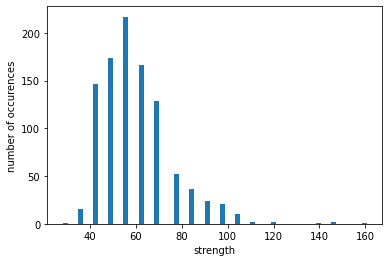

In [32]:
plt.xlabel('strength')
plt.ylabel('number of occurences')
plt.hist(file['strength'], bins=60)

In [51]:
common_words = pd.read_csv("unigram_freq.csv")

In [52]:
list_of_bad_words = []

for i in common_words.index:
    if(len(str(common_words['name'][i])) <= 1):
        list_of_bad_words.append(i)


In [53]:
common_words = common_words.drop(list_of_bad_words)


In [54]:
common_words

,name,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
5,in,8469404971
...,...,...
333328,gooek,12711
333329,gooddg,12711
333330,gooblle,12711
333331,gollgo,12711


In [55]:
list_of_matches = []

In [ ]:
#Calculate the list of matches with the most common words

for i in file.index:
    match = ""
    for j in common_words.index:
        if(str(common_words['name'][j]) in str(file['name'][i])):
            match += str(common_words['name'][j]) + ","
    
    list_of_matches.append(match[:-1])
            



In [ ]:
file.index

In [ ]:
list_of_matches

In [ ]:
len(list_of_matches)

In [ ]:
file['matches'] = list_of_matches

In [ ]:
pd.set_option('display.max_rows', 1000)
file

In [8]:
country_dataset = pd.read_csv("../Datasets/top_200_password_2020_by_country_extended.csv")

In [9]:
country_dataset['Data Length'] = country_dataset['Password'].str.len()

In [10]:
L = country_dataset['Data Length']
N = 127 #number of symbols that can be typed (ascii table)

country_dataset['strength'] = L*(math.log(N))/math.log(2)

In [11]:

country_dataset.sort_values(by=['Data Length'])
country_dataset.dropna()

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,length,unique_chars,numbers,symbols,symbols_and_numbers,sequentials,Data Length,strength
0,cn,China,1,123456,8159358,< 1 second,1.0,0,6,6,6,0,6,0,6,41.932108
1,cn,China,2,123456789,1817250,< 1 second,2.0,0,9,9,9,0,9,0,9,62.898162
2,cn,China,3,12345678,700019,< 1 second,6.0,0,8,8,8,0,8,0,8,55.909477
3,cn,China,4,654321,245827,< 1 second,23.0,0,6,6,6,0,6,0,6,41.932108
4,cn,China,5,1234567890,210168,< 1 second,9.0,0,10,10,10,0,10,0,10,69.886847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,vn,Vietnam,196,hongngoc,2660,3 Hours,0.0,10800,8,5,0,0,0,0,8,55.909477
996,vn,Vietnam,197,anhtien,2628,17 Minutes,0.0,1020,7,6,0,0,0,0,7,48.920793
997,vn,Vietnam,198,lanhuong,2620,3 Hours,0.0,10800,8,7,0,0,0,0,8,55.909477
998,vn,Vietnam,199,congacon,2584,2 Hours,0.0,7200,8,5,0,0,0,0,8,55.909477


(array([  5.,   0.,   0.,  11.,   0.,   0.,   0.,  30.,   0.,   0., 339.,
          0.,   0.,   0., 167.,   0.,   0., 233.,   0.,   0.,   0., 123.,
          0.,   0.,  61.,   0.,   0.,   0.,  12.,   0.,   0.,  10.,   0.,
          0.,   0.,   6.,   0.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.]),
 array([ 20.96605406,  22.94618139,  24.92630872,  26.90643604,
         28.88656337,  30.8666907 ,  32.84681803,  34.82694536,
         36.80707268,  38.78720001,  40.76732734,  42.74745467,
         44.727582  ,  46.70770932,  48.68783665,  50.66796398,
         52.64809131,  54.62821863,  56.60834596,  58.58847329,
         60.56860062,  62.54872795,  64.52885527,  66.5089826 ,
         68.48910993,  70.46923726,  72.44936459,  74.42949191,
         76.40961924,  78.38974657,  80.3698739 ,  82.35000123,
         84.33012855,  86.31025588,  88.29038321,  90.27051054,
         92.25

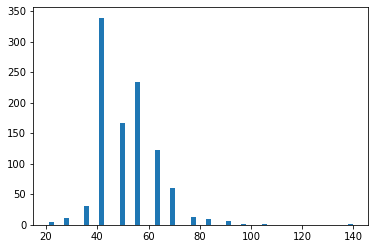

In [12]:
plt.hist(country_dataset['strength'], bins=60)

In [13]:
china_strengths = []
russia_strengths = []
spain_strengths = []
us_strengths = []
vietnam_strengths = []

for i in country_dataset.index:
    if(country_dataset['country'][i] == "China"):
        china_strengths.append(country_dataset['strength'][i])
    
    if(country_dataset['country'][i] == "Russia"):
        russia_strengths.append(country_dataset['strength'][i])
        
    if(country_dataset['country'][i] == "Spain"):
        spain_strengths.append(country_dataset['strength'][i])
        
    if(country_dataset['country'][i] == "United States"):
        us_strengths.append(country_dataset['strength'][i])
    
    if(country_dataset['country'][i] == "Vietnam"):
        vietnam_strengths.append(country_dataset['strength'][i])

In [17]:
vietnam_strengths

[41.932108120632996,
 62.89816218094949,
 55.90947749417733,
 69.88684686772166,
 55.90947749417733,
 55.90947749417733,
 55.90947749417733,
 48.920792807405164,
 62.89816218094949,
 41.932108120632996,
 55.90947749417733,
 48.920792807405164,
 55.90947749417733,
 41.932108120632996,
 62.89816218094949,
 41.932108120632996,
 55.90947749417733,
 48.920792807405164,
 48.920792807405164,
 48.920792807405164,
 48.920792807405164,
 62.89816218094949,
 62.89816218094949,
 55.90947749417733,
 48.920792807405164,
 76.87553155449383,
 55.90947749417733,
 41.932108120632996,
 41.932108120632996,
 48.920792807405164,
 69.88684686772166,
 76.87553155449383,
 55.90947749417733,
 55.90947749417733,
 41.932108120632996,
 55.90947749417733,
 48.920792807405164,
 69.88684686772166,
 62.89816218094949,
 41.932108120632996,
 41.932108120632996,
 41.932108120632996,
 62.89816218094949,
 41.932108120632996,
 55.90947749417733,
 62.89816218094949,
 55.90947749417733,
 48.920792807405164,
 41.932108120632996